In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
from sklearn.datasets import make_classification

In [43]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0 )

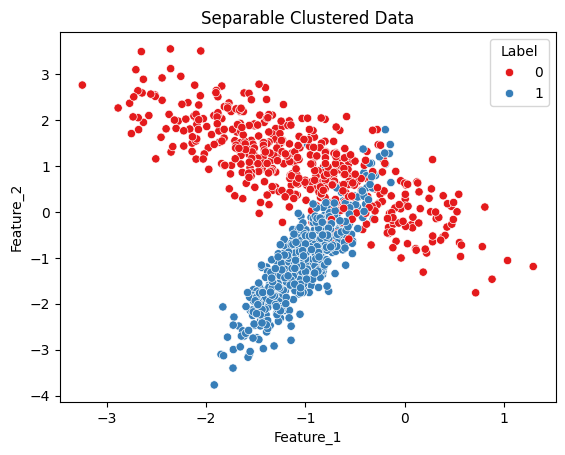

In [44]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Label'] = y
sns.scatterplot(data=df, x='Feature_1', y='Feature_2', hue='Label', palette='Set1')
plt.title("Separable Clustered Data")
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [46]:
from sklearn.svm import SVC

In [47]:
model=SVC(kernel='linear')


In [48]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [49]:
y_pred=model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(Y_test,y_pred)
print(score)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
print(classification_report(Y_test,y_pred))

0.8966666666666666
[[136  11]
 [ 20 133]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       147
           1       0.92      0.87      0.90       153

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [51]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train,Y_train)
y_pred=rbf.predict(X_test)
score=accuracy_score(Y_test,y_pred)
print(score)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
print(classification_report(Y_test,y_pred))

0.93
[[144   3]
 [ 18 135]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       147
           1       0.98      0.88      0.93       153

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [53]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,Y_train)
y_pred=polynomial.predict(X_test)
score=accuracy_score(Y_test,y_pred)
print(score)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
print(classification_report(Y_test,y_pred))

0.88
[[146   1]
 [ 35 118]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       147
           1       0.99      0.77      0.87       153

    accuracy                           0.88       300
   macro avg       0.90      0.88      0.88       300
weighted avg       0.90      0.88      0.88       300



In [54]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,Y_train)
y_pred=sigmoid.predict(X_test)
score=accuracy_score(Y_test,y_pred)
print(score)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
print(classification_report(Y_test,y_pred))

0.8333333333333334
[[122  25]
 [ 25 128]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       147
           1       0.84      0.84      0.84       153

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [57]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[100,10,1.0,0.1,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf','linear']}
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,verbose=3,refit=True)

In [58]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.914 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.957 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.893 total time=   0.0s
[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.914 total time=   0.0s
[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.893 total time=   0.0s
[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.929 total time=   0.0s
[CV 5/5] END .....C=100, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [100, 10, 1.0, 0.1, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [59]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}